In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('elaine_data.csv')
df.head()

,Unnamed: 0.1,date,total_sleep_hours,sleep_start,sleep_end,youtube_visit_time_first,youtube_visit_time_last,total_videos_watched,chrome_visit_time_first,chrome_visit_time_last,Unnamed: 0,total_count,uva,canvas,zzb2rf,drive,last_time
0,0,2025-01-01,7.566667,2025-01-01 01:58:50-05:00,2025-01-01 10:00:20-05:00,1900-01-01 11:24:47.221,1900-01-01 17:20:12.713,6.0,1900-01-01 19:28:58.402504,1900-01-01 20:49:10.591911,312,0,0,0,0,0,20.816667
1,1,2025-01-02,6.608333,2025-01-02 02:10:26-05:00,2025-01-02 08:59:56-05:00,1900-01-01 10:42:48.218,1900-01-01 22:42:36.226,45.0,1900-01-01 20:57:04.877178,1900-01-01 21:02:22.430207,313,0,0,0,0,0,21.033333
2,2,2025-01-05,8.775000,2025-01-05 00:32:58-05:00,2025-01-05 09:33:28-05:00,1900-01-01 19:34:25.659,1900-01-01 22:56:39.120,39.0,1900-01-01 16:03:46.136767,1900-01-01 16:57:30.015037,316,0,0,0,0,0,16.950000
3,3,2025-01-06,7.733333,2025-01-06 00:39:27-05:00,2025-01-06 08:26:57-05:00,1900-01-01 14:20:29.624,1900-01-01 21:25:50.348,14.0,1900-01-01 12:58:09.802701,1900-01-01 15:28:02.495664,317,0,0,0,0,0,15.466667
4,4,2025-01-07,8.425000,2025-01-07 01:11:51-05:00,2025-01-07 09:47:21-05:00,1900-01-01 14:54:35.739,1900-01-01 21:44:19.344,26.0,1900-01-01 20:20:22.024937,1900-01-01 20:22:32.044121,318,20,2,0,0,18,20.366667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.1              36 non-null     int64  
 1   date                      36 non-null     object 
 2   total_sleep_hours         36 non-null     float64
 3   sleep_start               36 non-null     object 
 4   sleep_end                 36 non-null     object 
 5   youtube_visit_time_first  33 non-null     object 
 6   youtube_visit_time_last   33 non-null     object 
 7   total_videos_watched      33 non-null     float64
 8   chrome_visit_time_first   36 non-null     object 
 9   chrome_visit_time_last    36 non-null     object 
 10  Unnamed: 0                36 non-null     int64  
 11  total_count               36 non-null     int64  
 12  uva                       36 non-null     int64  
 13  canvas                    36 non-null     int64  
 14  zzb2rf      

In [20]:
df["date"] = pd.to_datetime(df["date"])
df['day_of_week'] = df['date'].dt.day_name()

In [21]:
df = df.drop(["Unnamed: 0.1", "Unnamed: 0", "date", "sleep_end", "youtube_visit_time_first", "youtube_visit_time_last", "total_videos_watched"], axis=1)
df["sleep_start"] = pd.to_datetime(df["sleep_start"])
df['sleep_start_hour'] = (
    df['sleep_start'].dt.hour +
    df['sleep_start'].dt.minute / 60.0
)
df["chrome_visit_time_first"] = pd.to_datetime(df["chrome_visit_time_first"])
df['chrome_visit_time_first_hour'] = (
    df['chrome_visit_time_first'].dt.hour +
    df['chrome_visit_time_first'].dt.minute / 60.0
)
df["chrome_visit_time_last"] = pd.to_datetime(df["chrome_visit_time_last"])
df['chrome_visit_time_last_hour'] = (
    df['chrome_visit_time_last'].dt.hour +
    df['chrome_visit_time_last'].dt.minute / 60.0
)
df = df.drop(["sleep_start", "chrome_visit_time_first", "chrome_visit_time_last"], axis=1)
df.head()

,total_sleep_hours,total_count,uva,canvas,zzb2rf,drive,last_time,day_of_week,sleep_start_hour,chrome_visit_time_first_hour,chrome_visit_time_last_hour
0,7.566667,0,0,0,0,0,20.816667,Wednesday,1.966667,19.466667,20.816667
1,6.608333,0,0,0,0,0,21.033333,Thursday,2.166667,20.950000,21.033333
2,8.775000,0,0,0,0,0,16.950000,Sunday,0.533333,16.050000,16.950000
3,7.733333,0,0,0,0,0,15.466667,Monday,0.650000,12.966667,15.466667
4,8.425000,20,2,0,0,18,20.366667,Tuesday,1.183333,20.333333,20.366667


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_sleep_hours             36 non-null     float64
 1   total_count                   36 non-null     int64  
 2   uva                           36 non-null     int64  
 3   canvas                        36 non-null     int64  
 4   zzb2rf                        36 non-null     int64  
 5   drive                         36 non-null     int64  
 6   last_time                     36 non-null     float64
 7   day_of_week                   36 non-null     object 
 8   sleep_start_hour              36 non-null     float64
 9   chrome_visit_time_first_hour  36 non-null     float64
 10  chrome_visit_time_last_hour   36 non-null     float64
dtypes: float64(5), int64(5), object(1)
memory usage: 3.2+ KB


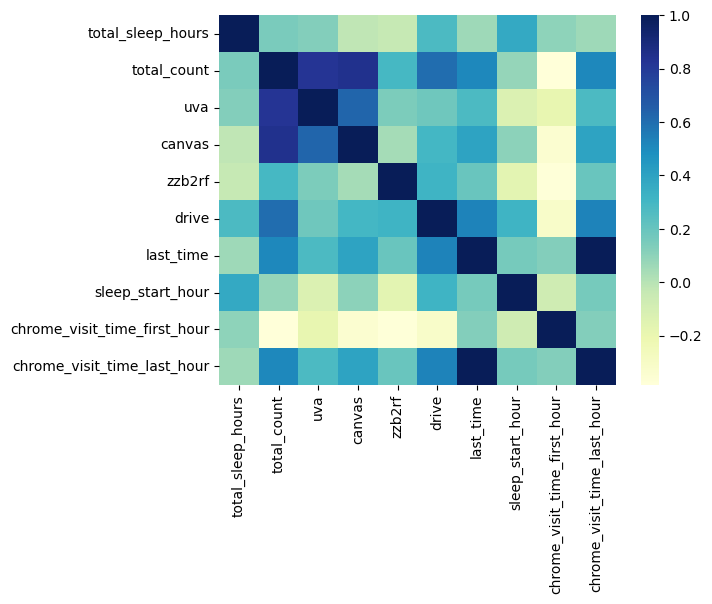

In [33]:
import sklearn
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)
corr_matrix.shape

corr_matrix["total_sleep_hours"].sort_values(ascending=False)

sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

In [9]:
df1 = df[df.isna().any(axis=1)]
len(df1)
df1.head()

,total_sleep_hours,total_count,uva,canvas,zzb2rf,drive,last_time,day_of_week,chrome_visit_time_first_hour,chrome_visit_time_last_hour


In [23]:
df_x = df.drop("total_sleep_hours", axis=1)
df_y = df["total_sleep_hours"].copy()

from sklearn.model_selection import train_test_split
x_train, xtest, y_train, ytest = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

housing_prep = x_train
housing_labels = y_train
test_labels = ytest
housing_num = housing_prep.select_dtypes(include=np.number)
housing_cat = housing_prep.select_dtypes(include="object")

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

num_attribs = housing_num.columns.tolist()
cat_attribs = housing_cat.columns.tolist()

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

housing_tr = full_pipeline.fit_transform(housing_prep)
housing_test = full_pipeline.transform(xtest)

In [12]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(housing_tr, housing_labels)

housing_predictions = lin_reg.predict(housing_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_r2 = r2_score(housing_labels, housing_predictions)

print(f"RMSE: {lin_rmse}, MAE: {lin_mae}, R2: {lin_r2}")

RMSE: 0.5518558567865789, MAE: 0.43863524101449486, R2: 0.5522180324331388


In [27]:
lin_scores = cross_val_score(lin_reg, housing_tr, housing_labels,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 0.96784216 10.40040864  1.31150604  1.13043935  1.24654794]
Mean: 3.0113488247810354
Standard deviation: 3.6963747789428245


In [29]:
feature_names = list(full_pipeline.get_feature_names_out())

coefficients = lin_reg.coef_

# Create a DataFrame to store feature importance
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

# Sort by absolute value to see the most impactful features
feature_importance["Absolute Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Absolute Coefficient", ascending=False)

# Display the top features
print(feature_importance)

                              Feature  Coefficient  Absolute Coefficient
10            cat__day_of_week_Monday    -0.543053              0.543053
11          cat__day_of_week_Saturday     0.504784              0.504784
4                          num__drive     0.494220              0.494220
3                         num__zzb2rf    -0.443104              0.443104
12            cat__day_of_week_Sunday     0.305464              0.305464
2                         num__canvas    -0.253827              0.253827
9             cat__day_of_week_Friday     0.240549              0.240549
13          cat__day_of_week_Thursday    -0.236330              0.236330
15         cat__day_of_week_Wednesday    -0.208165              0.208165
6               num__sleep_start_hour     0.092942              0.092942
1                            num__uva    -0.088888              0.088888
7   num__chrome_visit_time_first_hour    -0.064541              0.064541
14           cat__day_of_week_Tuesday    -0.063247 

In [30]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_tr, housing_labels)

housing_predictions = forest_reg.predict(housing_tr)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_mae = mean_absolute_error(housing_labels, housing_predictions)
forest_r2 = r2_score(housing_labels, housing_predictions)

print(f"RMSE: {forest_rmse}, MAE: {forest_mae}, R2: {forest_r2}")

RMSE: 0.3332408539868332, MAE: 0.2531785714285723, R2: 0.8367204609164451


In [31]:
forest_scores = cross_val_score(forest_reg, housing_tr, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.97029128 1.22556728 0.58795345 0.82126027 1.28016118]
Mean: 0.9770466914225745
Standard deviation: 0.2566513064534786


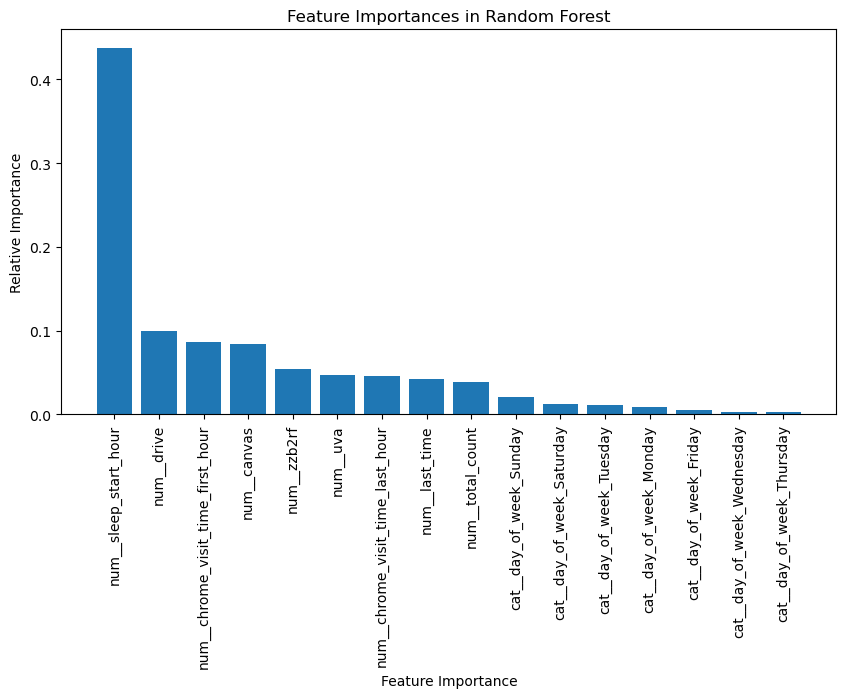

num__sleep_start_hour: 0.4378
num__drive: 0.0997
num__chrome_visit_time_first_hour: 0.0868
num__canvas: 0.0844
num__zzb2rf: 0.0537
num__uva: 0.0467
num__chrome_visit_time_last_hour: 0.0455
num__last_time: 0.0423
num__total_count: 0.0389
cat__day_of_week_Sunday: 0.0211
cat__day_of_week_Saturday: 0.0119
cat__day_of_week_Tuesday: 0.0117
cat__day_of_week_Monday: 0.0091
cat__day_of_week_Friday: 0.0052
cat__day_of_week_Wednesday: 0.0028
cat__day_of_week_Thursday: 0.0023


In [32]:
forest_importances = forest_reg.feature_importances_
sorted_idx = np.argsort(forest_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(forest_importances)), forest_importances[sorted_idx], align="center")
plt.xticks(range(len(forest_importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Relative Importance")
plt.title("Feature Importances in Random Forest")
plt.show()

for feature, importance in sorted(zip(feature_names, forest_importances), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

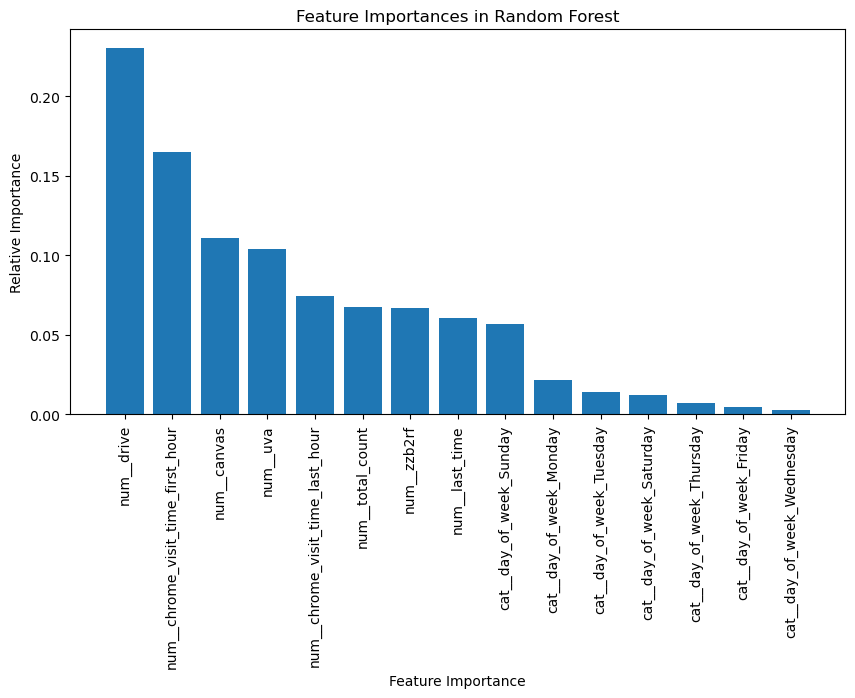

num__drive: 0.2306
num__chrome_visit_time_first_hour: 0.1653
num__canvas: 0.1109
num__uva: 0.1042
num__chrome_visit_time_last_hour: 0.0746
num__total_count: 0.0675
num__zzb2rf: 0.0669
num__last_time: 0.0609
cat__day_of_week_Sunday: 0.0571
cat__day_of_week_Monday: 0.0213
cat__day_of_week_Tuesday: 0.0140
cat__day_of_week_Saturday: 0.0120
cat__day_of_week_Thursday: 0.0070
cat__day_of_week_Friday: 0.0048
cat__day_of_week_Wednesday: 0.0029


In [ ]:
forest_importances = forest_reg.feature_importances_
sorted_idx = np.argsort(forest_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(forest_importances)), forest_importances[sorted_idx], align="center")
plt.xticks(range(len(forest_importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Relative Importance")
plt.title("Feature Importances in Random Forest")
plt.show()

for feature, importance in sorted(zip(feature_names, forest_importances), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")